<h1>HW3</h1>

# Question 1
### (Bayes Theorem) Read the following example and complete the exercises 

Trolls Under the Bridge
1. Trolls(T) are bad
2. Gnomes(G) are benign
3. Every bridge has 5 creatures under it

Below are the probabilities of what creatures live under a bridge:
1. TTGGG: 20% (E1)
2. TGGGG: 20% (E2)
3. GGGGG: 60% (E3)

A knight is approaching a bridge and he wants to know his chance of crossing the bridge safely.

### 1.1 

#### What is the chance of the knight crossing the bridge safely?


0.6 or 60%

### 1.2

#### Before crossing a bridge, a knight captures a troll. “I now have an 80% chance of crossing safely,” he reasons, “since only the case 20% had TTGGG (E1) now have TGGG is still a threat.”

#### Do you agree with him? Why?

I don't agree because before he captured a troll hi odds for survial was 60%, but now that he has to capture a troll he elimates the option of not encountering a troll at all. Thus, there are 3 possible trolls we could encounter and a 2/3 chance that he encounters a group that contains 2 trolls. If he encounters this group of creatures he will get hit by a troll after capture, ths having a 2/3 chance of getting hit. This leaves him with only 1/3 or 33.3 percent chance of encountering only one troll and surviving. Compared to not capturing, his odds for survival is reduced.  

### 1.3

#### Now he wants to use Bayes' theorem to calculate his chance of crossing safely given a troll captured 

\begin{equation*}
P(A|B) = \frac{P(B|A)P(A)}{P(B)} \\
P(A|B): Posteior \\
P(B|A): Likelihood \\
P(A): Prior \\
P(B): Marginal Probability \\
\end{equation*}

#### Given the three events, E1, E2, and E3, which two of the three events does the knight need to consider after a troll was captured?

E1 and E2 because given that a troll is captured his odds for E3 are gone. 

### 1.4

#### Use Bayes' theorem to calculate the probability of the two events in 1.3 (separately) given the troll was captured. 

Probability of one event given a troll captured: 

In [64]:
#Prior = P(encountering a troll E1) = 1/5
#Likelihood = P(capturing a troll given that he encounters a troll E1) = 2/5
#marginal Probability = P(encounter a troll and getting to each path) = (2/5*1/5)+(1/5*1/5)+(0*3/5)
#Posterior = P(encounter a troll given that he encountera troll) = Likelihood * Prior / Marginal Probability
P_trollE1 = 1/5
P_captureafterencounterE1 = 2/5
P_encounterinallE = ((2/5)*(1/5))+((1/5)*(1/5))+((0)*(3/5))
P_encounteraftercaptureE1 = P_trollE1 * P_captureafterencounterE1 / P_encounterinallE
println("the probability that the knight encounters a troll given capturing in E1 is $P_encounteraftercaptureE1")

the probability that Bayes encounters a troll given capturing in E1 is 0.6666666666666666


Probability of the other event given a troll captured: 

In [63]:
#Prior = P(encountering a troll E2) = 1/5
#Likelihood = P(capturing a troll given that he encounters a troll E2) = 1/5
#marginal Probability = P(encounter a troll and getting to each path) = (2/5*1/5)+(1/5*1/5)+(0*3/5)
#Posterior = P(encounter a troll given that he encountera troll) = Likelihood * Prior / Marginal Probability
P_trollE2 = 1/5
P_captureafterencounterE2 = 1/5
P_encounterinallE = ((2/5)*(1/5))+((1/5)*(1/5))+((0)*(3/5))
P_encounteraftercaptureE2 = P_trollE1 * P_captureafterencounterE2 / P_encounterinallE
println("the probability that the knight encounters a troll given capturing in E2 is $P_encounteraftercaptureE2")

the probability that Bayes encounters a troll given capturing in E2 is 0.3333333333333333


### 1.5

#### What is the chance of the knight crossing safely?

In order for the knight to cross safely he must not encounter a second troll (E1), thus he must encounter E2, in which his odds are 1/3 or 33.3 percent 

#### Now looking back to 1.1, the probabilities were changed after assimilating data! 

# Question 2
### (Polynomial Fitting) Read the following example and complete the exercises 

Biological data always comes with errors that influence the intepretation of the data significantly. In this question, we will simulate data and see how noises affect the parameter estimation.

In [7]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random"])

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [8]:
import Distributions as di
import Plots
import Polynomials
import Random

### 2.1

1. Generate the independent variable x ranging from -10 to 10 with an increment of 1
2. Generate the dependent variable y_true using the equation y_true = x^2 + 3x - 2


In [9]:
x = -10:1:10
f(x) = x .^2 + 3.0 .* x - 2
y_true = f.(x)

21-element Vector{Float64}:
  68.0
  52.0
  38.0
  26.0
  16.0
   8.0
   2.0
  -2.0
  -4.0
  -4.0
  -2.0
   2.0
   8.0
  16.0
  26.0
  38.0
  52.0
  68.0
  86.0
 106.0
 128.0

### 2.2

1. Generate the Guassian noises with zero mean and a standard deviation of 10

2. Add the noises to y_true to obtain y_observed


In [10]:
dataerr = 10
d = di.Normal(0,dataerr)
y_observed = y_true + rand(d,length(x))

21-element Vector{Float64}:
  66.68330261587639
  61.14573938298743
  34.77509139234187
  49.26945825251575
  25.086094500982995
  25.064014875642922
  -5.971769275202405
  -4.287628684666998
  -1.970639598468336
 -17.62092264086627
  -5.869810951586192
   4.105597835698104
   0.34175265416568124
  11.749760500110565
  31.721494654938326
  53.910294511429655
  51.68101164654417
  55.44097275533456
  90.17078007336868
  94.64504447962068
 135.59313770708167

### 2.3

#### Fit the data (x, y_observed) with a second order polynomial. 

1. Make a scatter plot of y_observed along x
2. Plot a line of y_true along x on the scatter plot
3. Plot a line of the fitted polynomial along x on the same plot

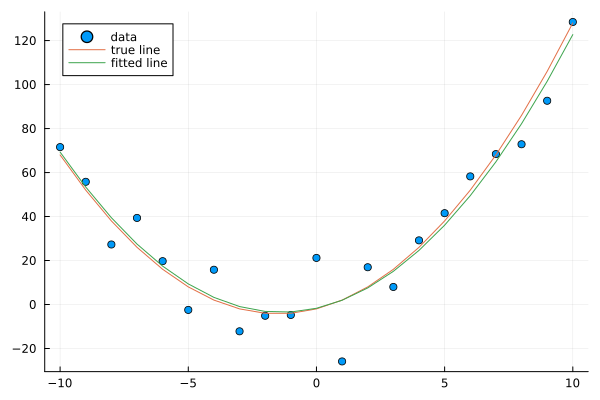

In [51]:
using Plots
using Random
using Polynomials: Polynomial, fit, coeffs
using Statistics
dataerr = 10
d = di.Normal(0,dataerr)
x = -10:1:10
y_observed = y_true + rand(d,length(x))
f(x) = x .^2 + 3.0 .* x - 2
y_true = f.(x)
line_fit = fit(x,y_observed,2)
fit_coeff = coeffs(line_fit)
y_fitted = fit_coeff[1] .+ fit_coeff[2] .* x + fit_coeff[3] .* x.^2
scatter(x,y_observed, label = "data")
plot!(x,y_true, label = "true line")
plot!(x,y_fitted, label = "fitted line")

### 2.4

1. Repeat 2.2 and 2.3 with a noise with a standard deviation of 50

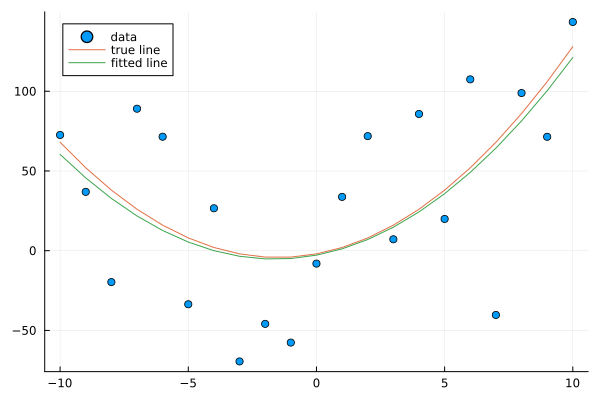

In [12]:
dataerr = 50
d = di.Normal(0,dataerr)
y_observed = y_true + rand(d,length(x))
x = -10:1:10
f(x) = x .^2 + 3.0 .* x - 2
y_true = f.(x)
line_fit = fit(x,y_observed,2)
fit_coeff = coeffs(line_fit)
y_fitted = fit_coeff[1] .+ fit_coeff[2] .* x + fit_coeff[3] .* x.^2
scatter(x,y_observed, label = "data")
plot!(x,y_true, label = "true line")
plot!(x,y_fitted, label = "fitted line")

2. Compare the plot with the plot in 2.3. Is the fit closer to y_true or not, and why?

No, 2.4 is not closer than 2.3 because the data error is higher, thus the data points are further from the fit line. 

### 2.5

#### Repeat 2.2 and 2.3 with a tenth order polynomial fit


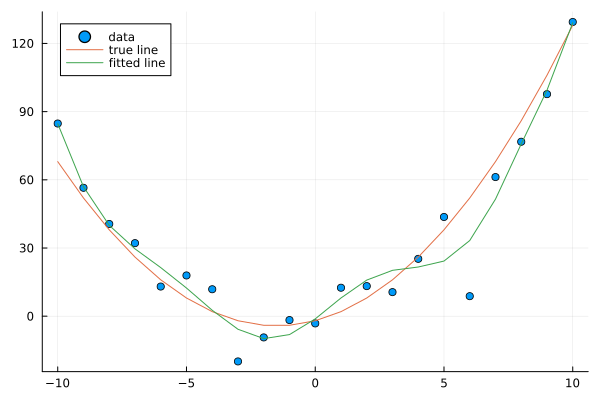

In [35]:
dataerr = 10
d = di.Normal(0,dataerr)
y_observed = y_true + rand(d,length(x))
x = -10:1:10
f(x) = x .^2 + 3.0 .* x - 2
y_true = f.(x)
line_fit = fit(x,y_observed,10)
fit_coeff = coeffs(line_fit)
y_fitted = line_fit.(x)
scatter(x,y_observed, label = "data")
plot!(x,y_true, label = "true line")
plot!(x,y_fitted, label = "fitted line")

### 2.6

1. Create a new independent parameter x_fit ranging from -11 to 11 with an increment of 0.1
2. Plot the same three plots as in 2.3 again but apply the tenth order polynomial to x_fit instead of x


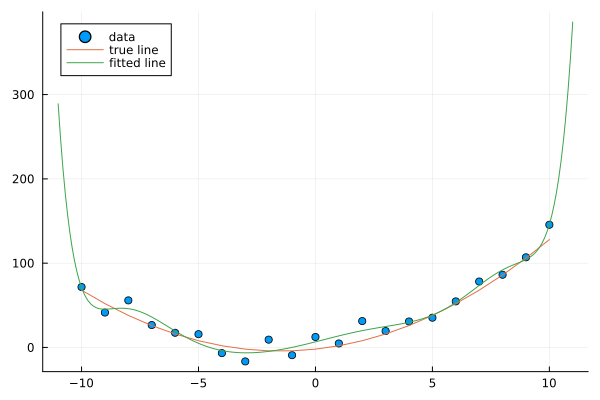

In [53]:
dataerr = 10
d = di.Normal(0,dataerr)
x_fit = -11:0.1:11
f(x) = x .^2 + 3.0 .* x - 2
y_true = f.(x)
y_observed = y_true + rand(d,length(x))
line_fit = fit(x,y_observed,10)
y_fitted = line_fit.(x_fit)
scatter(x,y_observed, label = "data")
plot!(x,y_true, label = "true line")
plot!(x_fit,y_fitted, label = "fitted line")

3. What do you observe in the plot? What is this phenomenon called?

I see the fitted line weaving through the data points and passing through many of the points. This is known as over-fitting.